written by Charlie Moffett, CUSP 2017

__Assignment 1: Test the Z test__

In [2]:
import numpy as np
import pylab as pl
import pandas as pd
import scipy.stats
import os

%pylab inline

Populating the interactive namespace from numpy and matplotlib


# N(0,1)

In [3]:
# Generate parameter distribution
np.random.seed(125)

# first let's make an x-axis
# we can do it at regular intervals
x = np.random.normal(111,14,100) # 50 points between 10 and 100

Text(65,-5,'The distribution is Gaussian, with a mean of 10 and a standard deviation of 100')

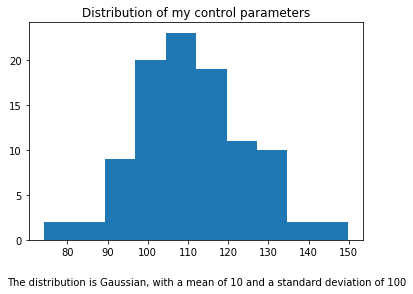

In [4]:
# plotting histogram of my normal distribution
# will need N(0,1) distribution to compare with later!
pl.hist(x)
pl.title('Distribution of my control parameters')
pl.text(x=65, y=-5, s='The distribution is Gaussian, with a mean of 10 and a standard deviation of 100')

# Poisson

In [9]:
# Generate N samples from a distribution of your choice (Poisson) 
np.random.seed(999)

mean = 111
sigma = 14
N = 100
lm = mean

mydict = {}
mydict['pois'] = {} 
mydict['pois']['means'] = {}

for i in range(100):
    mydict['pois'][i] = np.random.poisson(lm, size= N)
    
# Calculate the mean of each sample (all samples should have the same size n)
for q in mydict['pois']:
    if not type(q) == str:
        mydict['pois']['means'][q] = mydict['pois'][q].mean()
        
mymeans = mydict['pois']['means'].values()
print(mymeans)

dict_values([112.81999999999999, 109.73999999999999, 109.77, 110.48, 111.37, 110.67, 110.97, 109.34, 111.33, 109.86, 110.98999999999999, 110.15000000000001, 111.70999999999999, 111.36, 111.68000000000001, 111.47, 110.56, 110.87, 112.03, 110.55, 111.11, 110.76000000000001, 110.06999999999999, 111.29000000000001, 110.31, 109.41, 110.84, 111.33, 110.73999999999999, 110.83, 110.66, 110.51000000000001, 110.68000000000001, 111.66, 111.42, 109.76000000000001, 111.17, 109.88, 110.58, 111.67, 110.81, 111.92, 108.84999999999999, 111.64, 111.06, 109.56, 109.23999999999999, 110.51000000000001, 112.68000000000001, 110.05, 110.34999999999999, 110.08, 112.09, 109.51000000000001, 112.13, 111.05, 111.06, 109.09999999999999, 110.95999999999999, 111.27, 111.51000000000001, 111.81999999999999, 109.83, 109.98, 110.56999999999999, 110.59, 111.43000000000001, 111.04000000000001, 110.28, 109.44, 110.33, 110.23, 110.8, 111.13, 110.38, 110.13, 110.52, 111.81, 111.79000000000001, 109.93000000000001, 109.64, 111.

Text(0.5,1,'1 of 100 randomly generated samples with Poisson distribution')

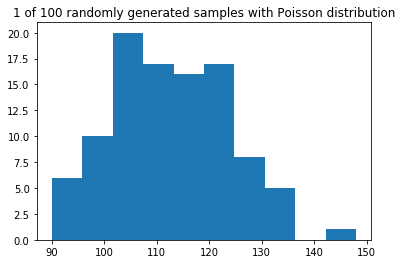

In [10]:
# plot at least one of the samples
pl.hist(mydict['pois'][0])
pl.title('1 of 100 randomly generated samples with Poisson distribution')

# Ploting the distribution of Z stats

In [20]:
# establish function for Z Test
def ztest(m):
    """formula for z test"""
    z = (mean - m) / sigma * sqrt(N)
    return z

Text(0.5,1,'Distribution of Z-scores for random samples set')

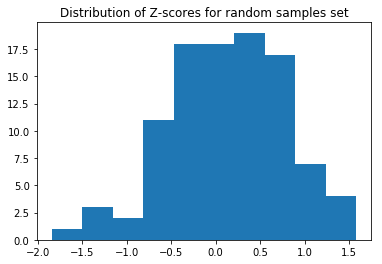

In [21]:
# plot the z test distribution
myscores = []

for m in mymeans:
    myscore = ztest(m)
    myscores.append(myscore)
    
pl.hist(myscores)
pl.title('Distribution of Z-scores for random samples set')

# Fit Z Stats with normal distribution
$H_0$: My sample distribution ('zscores') comes from a normal distribution, N(0,1)

$\alpha = 0.05$

Text(0.5,1,'Normal distribution (m = 0, sigma = 1) fit to z-score distribution')

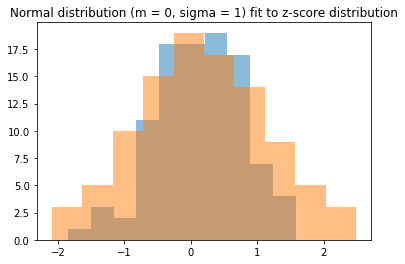

In [22]:
np.random.seed(999)
newNorm = np.random.normal(0, 1, 100)
pl.hist(myscores, alpha = .5)
# uses normal distribution from above
pl.hist(newNorm, alpha = .5)
pl.title('Normal distribution (m = 0, sigma = 1) fit to z-score distribution')

In [23]:
# Assess the validity of the Z-test (KS test)
simpleTest = scipy.stats.kstest(myscores, 'norm')
print ("Normal v. Z-Scores\nstat: {}, pvalue: {}".format(simpleTest[0], simpleTest[1]))

Normal v. Z-Scores
stat: 0.1690337661852021, pvalue: 0.005748301451298232


### As a result of this simple test (KS), we should reject the NH $H_0$ because the p-value (0.005) is less than the p-value (0.05) we set at the start. This means that the Z-score distribution doesn't comes from a Normal distribution.